Here is the updated pipeline to predict the next month's stock prices based on the last six months of historical data. The following updates include adjusting the dataset to work specifically with the last 6 months and generating predictions for the upcoming month:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('lstm_stock_model.h5')

def stock_prediction_pipeline(file_path):
    """
    Pipeline for processing raw stock data and predicting future stock prices using the trained LSTM model.

    Parameters:
        file_path (str): Path to the .csv file containing raw stock data.

    Returns:
        predictions_df (pd.DataFrame): Predicted stock prices for the next month.
    """
    # Load raw data
    df = pd.read_csv(file_path, parse_dates=[0], index_col=0)
    print("Raw data loaded successfully.")

    df = df.sort_index()

    # Get the last six months of data
    # in case of day then df.last('5D')
    df = df.last('6M')

    close_prices = df[['Close']].values

    # Handle missing values (if any)
    df['Close'].fillna(method='ffill', inplace=True)

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(close_prices)

    # Create sequences for prediction
    def create_sequences(data, seq_length=60):
        X = []
        for i in range(seq_length, len(data)):
            X.append(data[i-seq_length:i, 0])
        return np.array(X)

    sequence_length = 60  # Same as used during training
    X_input = create_sequences(scaled_data, seq_length=sequence_length)
    X_input = np.expand_dims(X_input, axis=-1)  # Add dimension for LSTM

    # Predict for the next month (20 business days)
    future_predictions = []
    # Starts with the last sequence of 60 timesteps from the input data (X_input).
    last_sequence = X_input[-1]  # Start with the last known sequence
    for _ in range(20):  # Predicting 20 business days
        # Makes a prediction for the next timestep using the last_sequence.
        next_pred = model.predict(np.expand_dims(last_sequence, axis=0))
        future_predictions.append(next_pred[0, 0])
        # Update the last sequence with the predicted value
        last_sequence = np.append(last_sequence[1:], next_pred[0, 0])
        last_sequence = np.expand_dims(last_sequence, axis=-1)

    # Rescale predictions back to the original scale
    future_predictions_rescaled = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

    # Prepare output
    future_dates = pd.date_range(start=df.index[-1], periods=21, freq='B')[1:]  # Next 20 business days
    predictions_df = pd.DataFrame({
        'Date': future_dates,
        'Predicted_Close': future_predictions_rescaled.flatten(),
    })

    return predictions_df

# Use the pipeline
file_path = 'apple_stock_data.csv'  # Path to new raw data file
predicted_stock_prices = stock_prediction_pipeline(file_path)
display(predicted_stock_prices)


<ipython-input-1-ecf4fc42f15f>:27: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  df = df.last('6M')
<ipython-input-1-ecf4fc42f15f>:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.last('6M')
<ipython-input-1-ecf4fc42f15f>:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Close'].fillna(method='ffill', inplace=True)
<ipython-input-1-ecf4fc42f15f>:33: FutureWarning: Series.fillna

Raw data loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


,Date,Predicted_Close
0,2025-01-14,240.793579
1,2025-01-15,240.299789
2,2025-01-16,240.241699
3,2025-01-17,240.372513
4,2025-01-20,240.581161
5,2025-01-21,240.815033
6,2025-01-22,241.048157
7,2025-01-23,241.267776
8,2025-01-24,241.468430
9,2025-01-27,241.648651


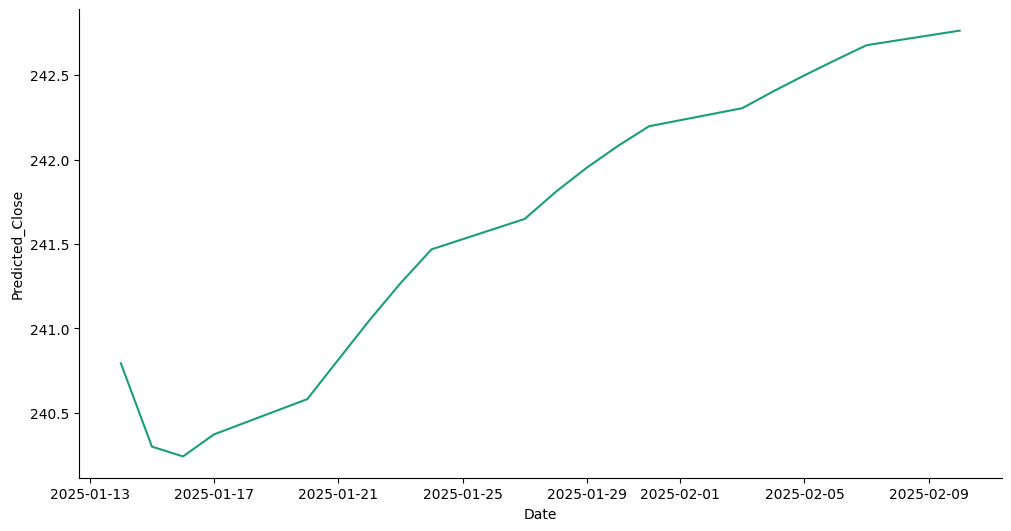

In [ ]:
# @title Date vs Predicted_Close

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Predicted_Close']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = predicted_stock_prices.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Predicted_Close')

### Evaluation (last two month vs next month)

<ipython-input-13-05f0d9f51010>:18: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  last_two_month_actual = df.last('2M')
<ipython-input-13-05f0d9f51010>:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  last_two_month_actual = df.last('2M')


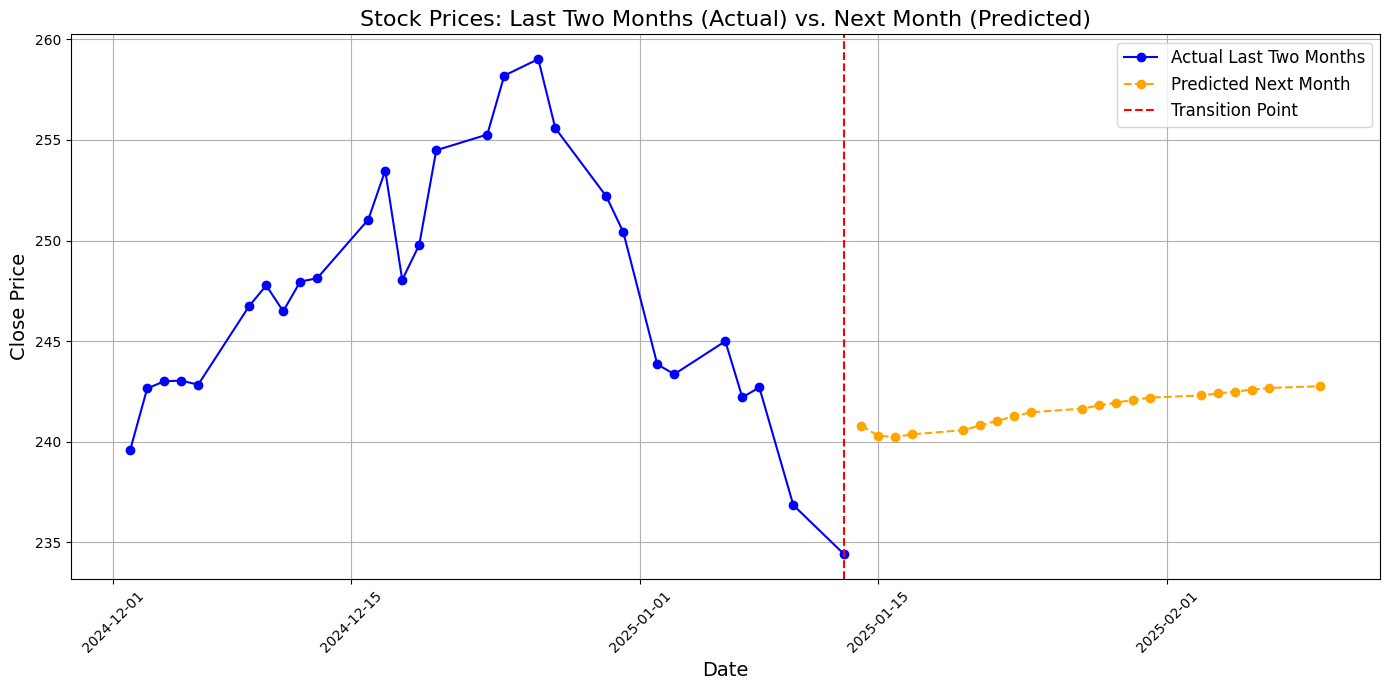


Last Two Month Actual Data:


,Open,High,Low,Close,Volume
2024-12-02,237.270,240.7900,237.1600,239.59,48137103.0
2024-12-03,239.810,242.7600,238.9000,242.65,38861017.0
2024-12-04,242.870,244.1100,241.2500,243.01,44383935.0
2024-12-05,243.990,244.5400,242.1300,243.04,40033878.0
2024-12-06,242.905,244.6300,242.0800,242.84,36870619.0
2024-12-09,241.830,247.2400,241.7500,246.75,44649232.0
2024-12-10,246.890,248.2100,245.3400,247.77,36914806.0
2024-12-11,247.960,250.8000,246.2601,246.49,45205814.0
2024-12-12,246.890,248.7400,245.6800,247.96,32777532.0
2024-12-13,247.815,249.2902,246.2400,248.13,33155290.0



Next Month Predicted Data:


,Date,Predicted_Close
0,2025-01-14,240.793579
1,2025-01-15,240.299789
2,2025-01-16,240.241699
3,2025-01-17,240.372513
4,2025-01-20,240.581161
5,2025-01-21,240.815033
6,2025-01-22,241.048157
7,2025-01-23,241.267776
8,2025-01-24,241.468430
9,2025-01-27,241.648651


In [ ]:
def evaluate_and_visualize(file_path, predictions_df):
    """
    Evaluate and visualize the last month of actual stock data and the next month of predicted stock data.

    Parameters:
        file_path (str): Path to the .csv file containing raw stock data.
        predictions_df (pd.DataFrame): DataFrame containing future dates and predicted stock prices.

    Returns:
        None
    """
    # Load raw data
    df = pd.read_csv(file_path, parse_dates=[0], index_col=0)
    df = df.sort_index()

    # Get the last month of actual stock prices
    # last_month_actual = df.last('1M')
    last_two_month_actual = df.last('2M')

    # Combine actual and predicted data for visualization
    combined_df = pd.concat([
        pd.DataFrame({'Date': last_two_month_actual.index, 'Close': last_two_month_actual['Close'], 'Type': 'Actual'}),
        pd.DataFrame({'Date': predictions_df['Date'], 'Close': predictions_df['Predicted_Close'], 'Type': 'Predicted'})
    ]).reset_index(drop=True)

    # Visualization
    plt.figure(figsize=(14, 7))

    # Plot actual data
    actual_data = combined_df[combined_df['Type'] == 'Actual']
    predicted_data = combined_df[combined_df['Type'] == 'Predicted']

    plt.plot(actual_data['Date'], actual_data['Close'], label='Actual Last Two Months', color='blue', marker='o')
    plt.plot(predicted_data['Date'], predicted_data['Close'], label='Predicted Next Month', color='orange', linestyle='--', marker='o')

    # Highlight the transition between actual and predicted
    if not actual_data.empty:
        plt.axvline(x=actual_data['Date'].iloc[-1], color='red', linestyle='--', label='Transition Point')

    # Add labels, legend, and title
    plt.title('Stock Prices: Last Two Months (Actual) vs. Next Month (Predicted)', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Close Price', fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(fontsize=12)
    plt.grid()

    plt.tight_layout()
    plt.show()

    # last two months and predicted data for comparison
    print("\nLast Two Month Actual Data:")
    display(last_two_month_actual)

    print("\nNext Month Predicted Data:")
    display(predictions_df)

# Use the function
evaluate_and_visualize('apple_stock_data.csv', predicted_stock_prices)
